In [11]:
import pathlib
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [19]:
data_dir = '/Users/rdua/Downloads/alpine'
data_dir = pathlib.Path(data_dir)

In [20]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

33


In [23]:
images = list(data_dir.glob('alpine/*.jpg'))
for i in images:
    im = PIL.Image.open(str(images[0]))
    print(im.size)

(3024, 4032)
(3024, 4032)
(3024, 4032)
(3024, 4032)
(3024, 4032)
(3024, 4032)
(3024, 4032)
(3024, 4032)
(3024, 4032)
(3024, 4032)
(3024, 4032)
(3024, 4032)
(3024, 4032)
(3024, 4032)
(3024, 4032)
(3024, 4032)
(3024, 4032)
(3024, 4032)
(3024, 4032)
(3024, 4032)
(3024, 4032)
(3024, 4032)
(3024, 4032)
(3024, 4032)
(3024, 4032)
(3024, 4032)
(3024, 4032)
(3024, 4032)
(3024, 4032)
(3024, 4032)
(3024, 4032)
(3024, 4032)
(3024, 4032)


In [24]:
#(3024, 4032)
batch_size = 33
img_height = 3024
img_width = 4032

In [25]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 33 files belonging to 1 classes.
Using 27 files for training.


In [26]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 33 files belonging to 1 classes.
Using 6 files for validation.


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    #plt.title(class_names[labels[i]])
    plt.axis("off")

In [31]:
#!mkdir alpine
path = './alpine'

In [33]:
tf.data.experimental.save(train_ds, path)

In [42]:
#new_dataset = tf.data.experimental.load(path,
#    tf.TensorSpec(shape=(img_height, img_width), dtype=tf.int64))
#for elem in new_dataset:
#  print(elem)

In [43]:
#new_dataset

In [50]:
batch_size = 33
img_height = 3024
img_width = 4032

def get_alpine_dataset(data_dir, batch_size, img_height, img_width):
    data_dir = pathlib.Path(data_dir)
    image_count = len(list(data_dir.glob('*/*.jpg')))
    train_ds = tf.keras.preprocessing.image_dataset_from_directory(
          data_dir,
          validation_split=0.2,
          subset="training",
          seed=123,
          image_size=(img_height, img_width),
          batch_size=batch_size)
    return train_ds

train_ds_1 = get_alpine_dataset(data_dir, batch_size, img_height, img_width)


Found 33 files belonging to 1 classes.
Using 27 files for training.


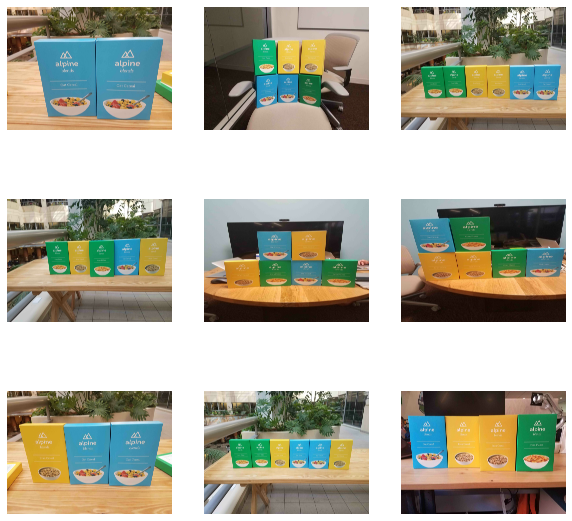

In [52]:
def show_data(ds):
    image_batch, label_batch = next(iter(ds))

    plt.figure(figsize=(10, 10))
    for i in range(9):
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(image_batch[i].numpy().astype("uint8"))
      #label = label_batch[i]
      #plt.title(class_names[label])
      plt.axis("off")
show_data(train_ds_1)

In [54]:
train_ds_1

<BatchDataset shapes: ((None, 3024, 4032, 3), (None,)), types: (tf.float32, tf.int32)>